## TensorFlow Project ##

In [ ]:
#!pip install tensorflow
#!pip install keras
# testing the githubwebhook from commit test 2 
#another test of webhook
# test4

In [2]:
#Init imports
import numpy as np
import pickle
import tensorflow as tf
import os
from PIL import Image
#from keras.datasets import cifar100
import matplotlib.pyplot as plt

import tarfile


from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.efficientnet import preprocess_input

In [2]:
#load the dataset from folder

file_path = 'C:\\Users\\Patrik Korsch\\Desktop\\VSE\\DAB\\Python\\tensorflow_computer_vision_project\\cifar-100-python.tar.gz'
# Extract the tar file
try:
    with tarfile.open(file_path, "r:gz") as tar:  # Changed mode from "r:gz" to "r:"
        tar.extractall(path='C:\\Users\\Patrik Korsch\\Desktop\\VSE\\DAB\\Python\\tensorflow_computer_vision_project')  # Specify the directory to extract to
    print("Files extracted successfully.")
except Exception as e:
    print("An error occurred:", e)

Files extracted successfully.


In [3]:
def load_cifar100_data(filename):
    
    with open(filename, 'rb') as file:
        data_dict = pickle.load(file, encoding='bytes')
        # Depending on how the data is structured, you might need to decode the bytes objects
        # Decode utf8-coded byte to normal strings if necessary
        # data_dict = {k.decode('utf8'): v for k, v in data_dict.items()}
        images = data_dict[b'data']
        images = images.reshape(images.shape[0], 3, 32, 32).transpose(0, 2, 3, 1)
        labels = data_dict[b'fine_labels']
        return images, labels

# Load training data
train_data, train_labels = load_cifar100_data('C:\\Users\\Patrik Korsch\\Desktop\\VSE\\DAB\\Python\\tensorflow_computer_vision_project\\cifar-100-python\\train')

# Load testing data
test_data, test_labels = load_cifar100_data('C:\\Users\\Patrik Korsch\\Desktop\\VSE\\DAB\\Python\\tensorflow_computer_vision_project\\cifar-100-python\\test')

# Optionally, load metadata for class labels
with open('C:\\Users\\Patrik Korsch\\Desktop\\VSE\\DAB\\Python\\tensorflow_computer_vision_project\\cifar-100-python\\meta', 'rb') as file:
    meta = pickle.load(file)
    fine_label_names = meta['fine_label_names']  # you might need to decode this if it's in bytes
    # fine_label_names = [x.decode('utf8') for x in fine_label_names]

print("Data loaded successfully.")

Data loaded successfully.


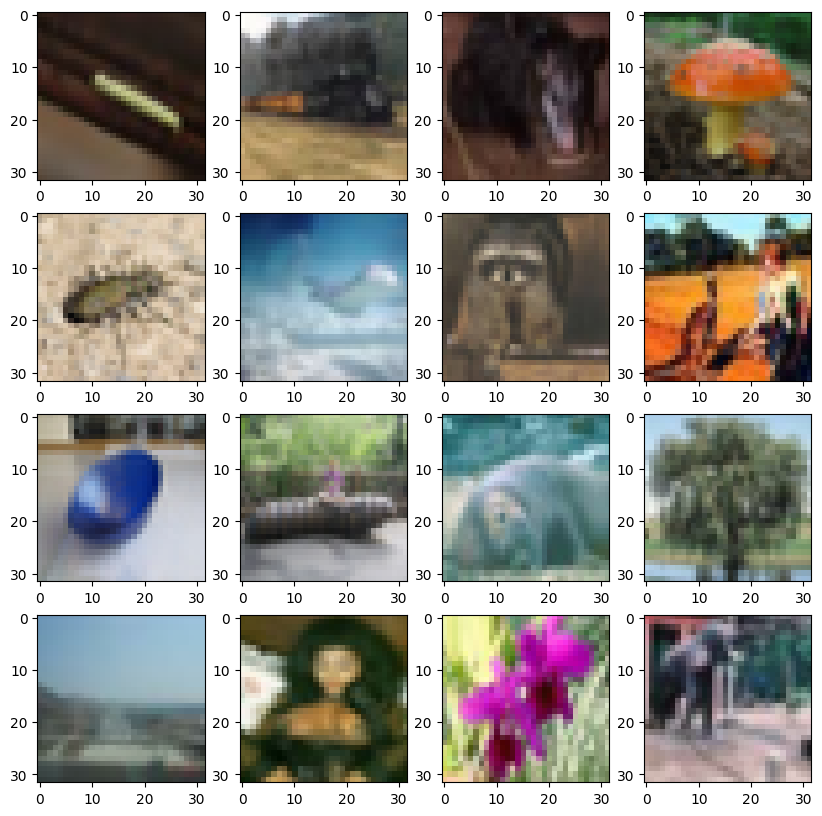

In [5]:
#Show random images
plt.figure(figsize=(10, 10))

for i in range (16):
  rand_num = np.random.randint(0, 500)
  cifar_img = plt.subplot(4,4, i+1)
  plt.imshow(train_data[rand_num])


In [4]:
category = np.array(meta['fine_label_names'])
category

array(['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee',
       'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus',
       'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle',
       'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch',
       'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant',
       'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house',
       'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion',
       'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain',
       'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter',
       'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate',
       'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road',
       'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk',
       'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar',
       'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone',
       't

In [6]:
normalized_train = np.array(train_data, dtype="float") / 255.0
normalized_test = np.array(test_data, dtype="float") / 255.0

In [20]:
#test_labels = np.array(test_labels)
#train_labels = np.array(train_labels)

In [5]:
# Assuming 'train_labels' and 'test_labels' are your label arrays from the dataset
train_labels = to_categorical(train_labels, num_classes=100)  # CIFAR-100 has 100 classes
test_labels = to_categorical(test_labels, num_classes=100)

In [35]:
train_data

array([[[[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [195, 205, 193],
         [212, 224, 204],
         [182, 194, 167]],

        [[255, 255, 255],
         [254, 254, 254],
         [254, 254, 254],
         ...,
         [170, 176, 150],
         [161, 168, 130],
         [146, 154, 113]],

        [[255, 255, 255],
         [254, 254, 254],
         [255, 255, 255],
         ...,
         [189, 199, 169],
         [166, 178, 130],
         [121, 133,  87]],

        ...,

        [[148, 185,  79],
         [142, 182,  57],
         [140, 179,  60],
         ...,
         [ 30,  17,   1],
         [ 65,  62,  15],
         [ 76,  77,  20]],

        [[122, 157,  66],
         [120, 155,  58],
         [126, 160,  71],
         ...,
         [ 22,  16,   3],
         [ 97, 112,  56],
         [141, 161,  87]],

        [[ 87, 122,  41],
         [ 88, 122,  39],
         [101, 134,  56],
         ...,
         [ 34,  36,  10],
        

In [60]:
print("Normalized train data shape:", normalized_train.shape)  # Expect (50000, 32, 32, 3) for CIFAR-100
print("Train labels shape:", train_labels.shape)               # Expect (50000, 100)
print("Normalized test data shape:", normalized_test.shape)    # Expect (10000, 32, 32, 3)
print("Test labels shape:", test_labels.shape)                 # Expect (10000, 100)


Normalized train data shape: (50000, 32, 32, 3)
Train labels shape: (50000, 100)
Normalized test data shape: (10000, 32, 32, 3)
Test labels shape: (10000, 100)


In [61]:
print("Sample train label (one-hot):", train_labels[0])

Sample train label (one-hot): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


## Implementation of EfficientNet ##

In [7]:
#dataGenerator

# Convert class vectors to binary class matrices (for use with categorical_crossentropy)
#y_train = to_categorical(train_tensor, 100)
#y_test = to_categorical(test_tensor, 100)

# Data augmentation generator
train_datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# For test data, often no augmentation is applied except normalization which you already did
test_datagen = ImageDataGenerator()


In [8]:
#This steps needs - images as normalized nupy arrays --> done
#                   labels as numpy arrays --> not done



train_generator = train_datagen.flow(
    normalized_train, train_labels,
    batch_size=32
)

test_generator = test_datagen.flow(
    normalized_test, test_labels,
    batch_size=32
)

In [13]:
#Building model
"""
CNN understanding: https://www.youtube.com/watch?v=KuXjwB4LzSA
tUTORIAL https://www.youtube.com/watch?v=umQKXMUCqQU&list=PLv8Cp2NvcY8DpVcsmOT71kymgMmcr59Mf&index=2
docu refference: https://www.tensorflow.org/api_docs/python/tf/keras/applications/EfficientNetB0
keras implementation: https://keras.io/api/applications/#usage-examples-for-image-classification-models

interesting reading: https://github.com/sayakpaul/TF-2.0-Hacks/blob/master/EfficientNet.ipynb

As it seems, no normalization is needed Efficientnet is working with 0-255 scale
"""
# Load the base model, not including the top layer (classifier), with pre-trained weights
base_model = EfficientNetB0(weights='imagenet', 
                            include_top=False, 
                            input_shape = (32, 32, 3))


# Add custom layers on top for CIFAR-100 classification
x = base_model.output
x = GlobalAveragePooling2D()(x)
#x = Dense(256, activation='relu')(x)  # You can adjust the number of neurons
output = Dense(100, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

# Compile the model
model.compile(optimizer= Adam(learning_rate=0.001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy']
              )

In [14]:
history = model.fit(
    train_generator,
    epochs=10,  # You can adjust the number of epochs
    validation_data=test_generator
)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 508s 298ms/step - accuracy: 0.1359 - loss: 3.8547 - val_accuracy: 0.2724 - val_loss: 3.1921
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 478s 306ms/step - accuracy: 0.2919 - loss: 2.8036 - val_accuracy: 0.3682 - val_loss: 2.6265
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 481s 307ms/step - accuracy: 0.3365 - loss: 2.5670 - val_accuracy: 0.3608 - val_loss: 2.7478
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 500s 320ms/step - accuracy: 0.3685 - loss: 2.4099 - val_accuracy: 0.4076 - val_loss: 2.3051
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 494s 316ms/step - accuracy: 0.3913 - loss: 2.2964 - val_accuracy: 0.4027 - val_loss: 2.3851
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 494s 316ms/step - accuracy: 0.4057 - loss: 2.2375 - val_accuracy: 0.3932 - val_loss: 2.4980
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 484s 310ms/step - accuracy: 0.4115 - loss: 2.1972 - val_accuracy: 0.4419 - val_loss: 2.2313
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 478s 305ms/step - ac

In [15]:
#Save the model

# Save the entire model to a HDF5 file.
model.save('C:\\Users\\Patrik Korsch\\Desktop\\VSE\\DAB\\Python\\tensorflow_computer_vision_project\\EffNet_V1.h5')

In [16]:
model.save('C:\\Users\\Patrik Korsch\\Desktop\\VSE\\DAB\\Python\\tensorflow_computer_vision_project\\EffNet_V1_keras_file.keras')

In [3]:
#Load model and plot the history

model = load_model('C:\\Users\\Patrik Korsch\\Desktop\\VSE\\DAB\\Python\\tensorflow_computer_vision_project\\EffNet_V1_keras_file.keras')

model.summary()

c:\Users\Patrik Korsch\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\saving\saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 215 variables whereas the saved optimizer has 428 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 32, 32, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_4         │ (None, 32, 32, 3) │          0 │ input_layer_2[0]… │
│ (Rescaling)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization_2     │ (None, 32, 32, 3) │          7 │ rescaling_4[0][0] │
│ (Normalization)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_5         │ (None, 32, 32, 3) │          0 │ normalization_2[… │
│ (Rescaling)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, 33, 33, 3) │          0 │ rescaling_5[0][0] │
│ (ZeroPadding2D)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 16, 16,    │        864 │ stem_conv_pad[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 16, 16,    │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 16, 16,    │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, 16, 16,    │        288 │ stem_activation[… │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, 16, 16,    │        128 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, 16, 16,    │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 32)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 32)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 8)   │        264 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 32)  │        288 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, 16, 16,    │          0 │ block1a_activati… │
│ (Multiply)          │ 32)               │            │ block1a_se_expan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 16, 16,    │        512 │ block1a_se_excit

 Total params: 8,313,321 (31.71 MB)

 Trainable params: 4,135,648 (15.78 MB)

 Non-trainable params: 42,023 (164.16 KB)

 Optimizer params: 4,135,650 (15.78 MB)

In [22]:
#load 10 images downscaled do 32x32 pixels and print the results
def load_and_resize_images(folder_path, target_size=(224, 224)):
    # List to hold all the image arrays
    images = []

    # Iterate over each file in the folder
    for filename in os.listdir(folder_path):
        # Construct full file path
        file_path = os.path.join(folder_path, filename)
        
        # Check if file is an image (you might want to add more checks/file types)
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            # Open the image
            with Image.open(file_path) as img:
                # Resize the image
                img = img.resize(target_size, Image.ANTIALIAS)
                
                # Convert the image to RGB
                img = img.convert('RGB')
                
                # Convert image to numpy array and append to the list
                images.append(np.array(img))
    
    # Convert list of arrays to a numpy array
    return np.array(images)

# Example usage:
# images = load_and_resize_images('path_to_your_folder')
# print(images.shape)  # This should show (number_of_images, 32, 32, 3)

In [23]:
images = load_and_resize_images('C:\\Users\\Patrik Korsch\\Desktop\\VSE\DAB\\Python\\tensorflow_computer_vision_project\\data\\photo_test')

C:\Users\Patrik Korsch\AppData\Local\Temp\ipykernel_30984\2905792922.py:16: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  img = img.resize(target_size, Image.ANTIALIAS)


In [4]:
pth = 'C:\\Users\\Patrik Korsch\\Desktop\\VSE\DAB\\Python\\tensorflow_computer_vision_project\\data\\photo_test'

def load_and_resize_images(folder_path, target_size=(224, 224), show_images=False):
    images = []
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            with Image.open(file_path) as img:
                img = img.resize(target_size, Image.ANTIALIAS)
                img = img.convert('RGB')
                image_array = np.array(img)

            #Prepocessing using tensorflow

                image_array = preprocess_input(image_array)
                images.append(image_array)
                if show_images:
                    plt.imshow(image_array)
                    plt.title(f"Resized: {filename}")
                    plt.axis('off')  # Turn off axis numbers and ticks
                    plt.show()
    return np.array(images)

C:\Users\Patrik Korsch\AppData\Local\Temp\ipykernel_14496\2588869917.py:9: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  img = img.resize(target_size, Image.ANTIALIAS)


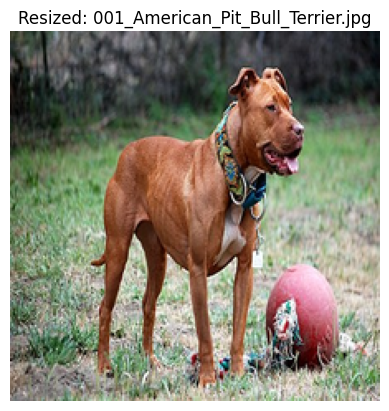

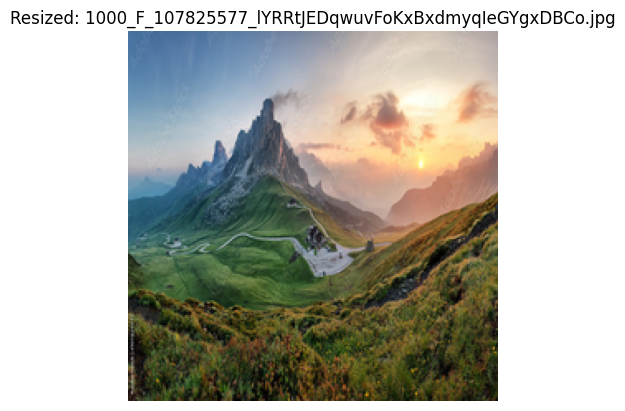

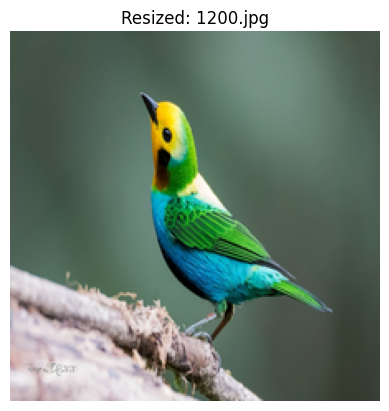

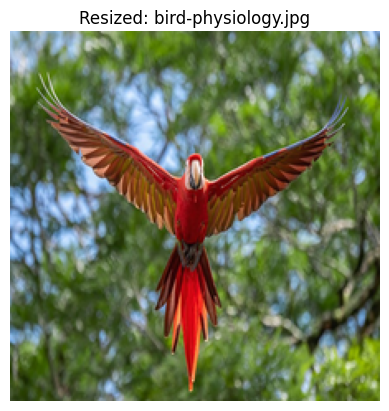

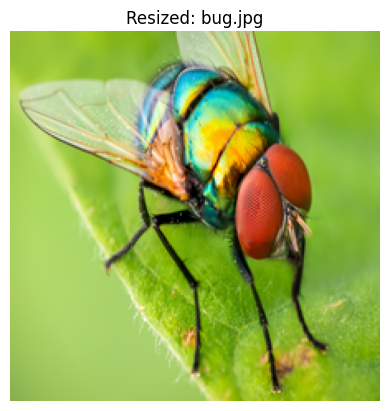

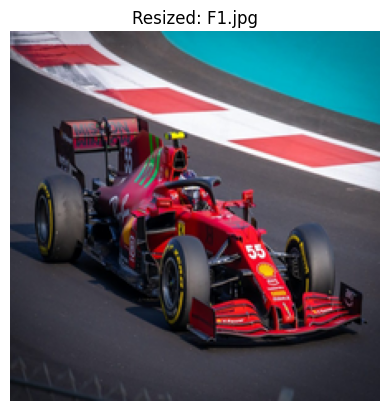

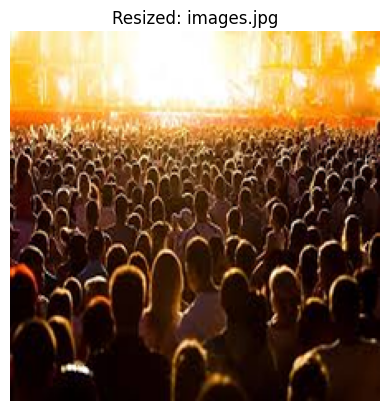

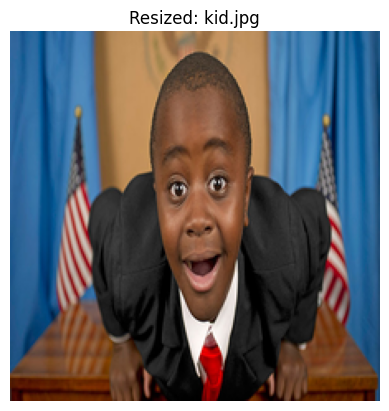

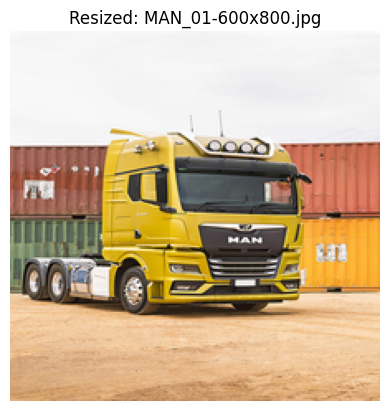

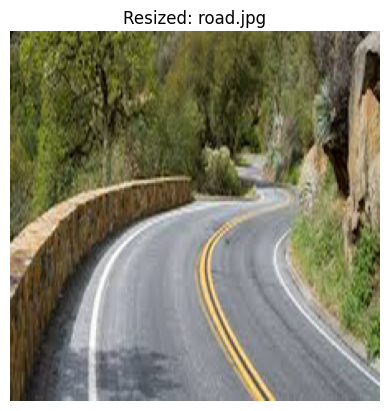

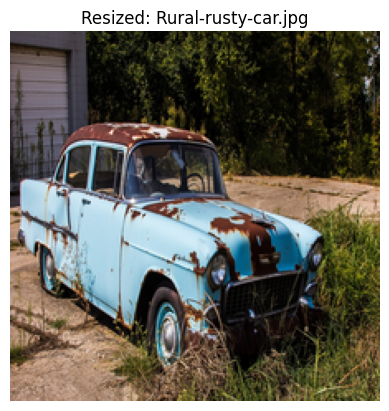

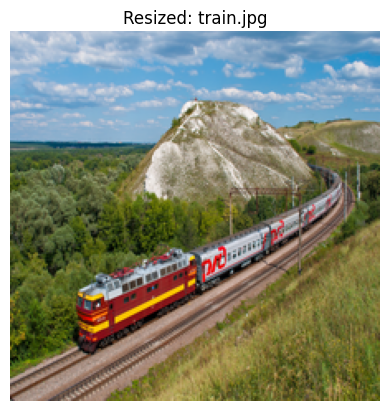

Batch shape: (12, 224, 224, 3)


In [5]:
images = load_and_resize_images(pth, show_images=True)
# Check if images are correctly shaped: (batch_size, 224, 224, 3)
print(f"Batch shape: {images.shape}")

In [6]:
predictions = model.predict(images)

ValueError: Input 0 of layer "functional_5" is incompatible with the layer: expected shape=(None, 32, 32, 3), found shape=(12, 224, 224, 3)

In [42]:
decoded_predictions = tf.keras.applications.efficientnet.decode_predictions(predictions, top=5)
for pred in decoded_predictions:
    print(pred)

[('n02093428', 'American_Staffordshire_terrier', 0.43593872), ('n02100583', 'vizsla', 0.17550562), ('n02087394', 'Rhodesian_ridgeback', 0.12732354), ('n02093256', 'Staffordshire_bullterrier', 0.0848184), ('n02108422', 'bull_mastiff', 0.017424783)]
[('n09468604', 'valley', 0.38819185), ('n09193705', 'alp', 0.27874374), ('n09472597', 'volcano', 0.06397389), ('n03792972', 'mountain_tent', 0.029165173), ('n09332890', 'lakeside', 0.00840462)]
[('n01828970', 'bee_eater', 0.31899226), ('n01537544', 'indigo_bunting', 0.07600171), ('n01843065', 'jacamar', 0.017252032), ('n01601694', 'water_ouzel', 0.011926219), ('n01530575', 'brambling', 0.010343725)]
[('n02006656', 'spoonbill', 0.4208732), ('n01833805', 'hummingbird', 0.17948727), ('n01818515', 'macaw', 0.12775515), ('n01828970', 'bee_eater', 0.08704853), ('n01608432', 'kite', 0.020356106)]
[('n02190166', 'fly', 0.9342329), ('n02268443', 'dragonfly', 0.0015519755), ('n02264363', 'lacewing', 0.0012202805), ('n02206856', 'bee', 0.0011220351), ('

In [25]:
norm_images = np.array(images) / 255.0


## Using Pretrained model ##

In [38]:
#EffNetB0 on max resolution 224x224 pixels
#norm_images = input images normalized

# Load the pre-trained EfficientNetB0 model
model = EfficientNetB0(weights='imagenet', 
                       include_top=True)

In [28]:
# Predicting with the model
predictions = model.predict(norm_images)

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


In [29]:
# Decode predictions
decoded_predictions = tf.keras.applications.efficientnet.decode_predictions(predictions, top=5)

# Print top 5 predictions for each image
for i, pred in enumerate(decoded_predictions):
    print(f"Image {i + 1} predictions:")
    for _, label, probability in pred:
        print(f"  {label}: {probability:.6f}")

35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
Image 1 predictions:
  butcher_shop: 0.001204
  cello: 0.001194
  grocery_store: 0.001190
  ice_cream: 0.001173
  four-poster: 0.001169
Image 2 predictions:
  butcher_shop: 0.001203
  cello: 0.001192
  grocery_store: 0.001188
  ice_cream: 0.001173
  four-poster: 0.001170
Image 3 predictions:
  butcher_shop: 0.001203
  cello: 0.001192
  grocery_store: 0.001189
  ice_cream: 0.001173
  four-poster: 0.001169
Image 4 predictions:
  butcher_shop: 0.001204
  cello: 0.001193
  grocery_store: 0.001189
  ice_cream: 0.001174
  four-poster: 0.001170
Image 5 predictions:
  butcher_shop: 0.001205
  cello: 0.001194
  grocery_store: 0.001190
  ice_cream: 0.001174
  confectionery: 0.001170
Image 6 predictions:
  butcher_shop: 0.001205
  cello: 0.001195
  grocery_store: 0.001191
  ice_cream: 0.001174
  confectionery: 0.001170
Image 7 predictions:
  butcher_shop: 0.001204
  cello: 0.001194
  grocery_store: 0.001190
  ice_cream: 0.001174
  confectionery: 0.0011